# [SciPy](https://scipy.github.io/devdocs/tutorial/index.html)
![SciPy](https://raw.githubusercontent.com/scipy/scipy-sphinx-theme/master/_static/scipyshiny_small.png)


# Table of Contents

1. [Physical Constants](#physical_constants)
2. [Optimization](#optimize)
    * [Least Squares Fitting using `curve_fit`](#curve_fit)
        - [Exercise 1](#exercise_1)
        - [Uncertainties and Initial Guesses](#uncertainties_guesses)
    * [Function Optimization using `minimize`](#minimize)
        - [Unbinned likelihood fits](#likelihood)
        - [Exercise 2](#exercise_2)
3. [Fast Fourier Transforms (FFTs)](#fft)
4. [Integration](#integration)
    * [Function Integration](#function_integration)
    * [Sample Integration](#sample_integration)
        - [Exercise 3](#exercise_3)
5. [Interpolation](#interpolation)
    * [Linear Interpolation](#linear_interpolation)
    * [Cubic Spline Interpolation](#spline_interpolation)
    * [Exercise 4](#exercise_4)
6. [Statistics](#stats)
    * [Probability Distributions](#stats_distributions)
        - [Continuous Distributions](#continuous_distributions)
        - [Discrete Distributions](#discrete_distributions)
        - [Multivariate Distributions](#multivariate_distributions)
    * [Statistical Functions](#statistical_functions)
    * [Example](#stats_example)
    * [Exercise 5](#exercise_5)
7. [Special Functions](#special_functions)
    * [Bessel Functions](#bessel)
    * [Orthogonal Polynomials](#ortho_polys)

# Importing and setting up the notebook (to be executed first!)

In [2]:
import scipy as sp
import numpy as np

# we will need to plot stuff later
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

<a id=physical_constants></a>
# Physical constants

In [3]:
import scipy.constants as const
const.epsilon_0

8.8541878128e-12

In [4]:
# Conversion of temperature units:
const.convert_temperature(100, old_scale='C', new_scale='K')

373.15

In [5]:
# More constants (including units and uncertainties)!
for k, v in const.physical_constants.items():
    print(k, ':', v)

Wien displacement law constant : (0.0028977685, 'm K', 5.1e-09)
atomic unit of 1st hyperpolarizablity : (3.20636151e-53, 'C^3 m^3 J^-2', 2.8e-60)
atomic unit of 2nd hyperpolarizablity : (6.2353808e-65, 'C^4 m^4 J^-3', 1.1e-71)
atomic unit of electric dipole moment : (8.47835309e-30, 'C m', 7.3e-37)
atomic unit of electric polarizablity : (1.648777274e-41, 'C^2 m^2 J^-1', 1.6e-49)
atomic unit of electric quadrupole moment : (4.48655124e-40, 'C m^2', 3.9e-47)
atomic unit of magn. dipole moment : (1.8548019e-23, 'J T^-1', 1.6e-30)
atomic unit of magn. flux density : (235051.756758, 'T', 7.1e-05)
deuteron magn. moment : (4.33073482e-27, 'J T^-1', 3.8e-34)
deuteron magn. moment to Bohr magneton ratio : (0.0004669754567, '', 5e-12)
deuteron magn. moment to nuclear magneton ratio : (0.8574382329, '', 9.2e-09)
deuteron-electron magn. moment ratio : (-0.0004664345548, '', 5e-12)
deuteron-proton magn. moment ratio : (0.3070122084, '', 4.5e-09)
deuteron-neutron magn. moment ratio : (-0.44820652, 

In [ ]:
val, unit, uncertainty = const.physical_constants['muon mass energy equivalent in MeV']
val, unit, uncertainty

<a id=optimize></a>
# Optimization

<a id=curve_fit></a>
## Least Squares Fitting using `curve_fit`

Levenberg-Marquardt algorithm for nonlinear optimization.

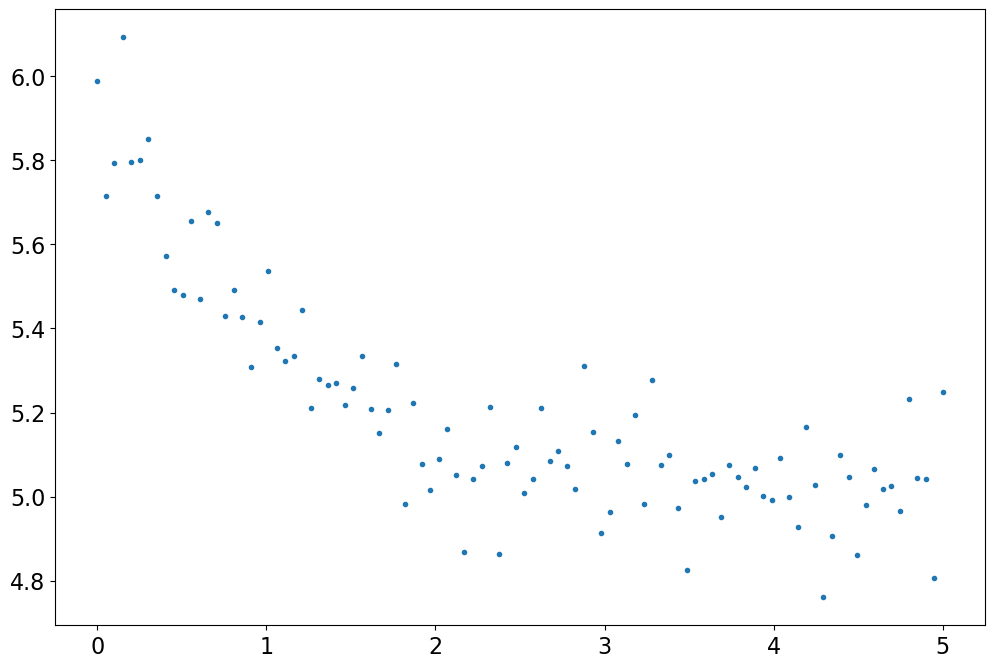

In [8]:
a = -1
b = 5

def f(x, a, b):
    return np.exp(a * x) + b

x = np.linspace(0, 5, 100)
y = f(x, a, b) + np.random.normal(0, 0.1, 100)

plt.plot(x, y, '.', label='data')

In [9]:
print(type(f))
f(1,2,2)

<class 'function'>


9.38905609893065

In [10]:
from scipy.optimize import curve_fit

params, covariance_matrix = curve_fit(f, x, y)

uncertainties = np.sqrt(np.diag(covariance_matrix))
error = ((y - f(x, *params))**2).sum()

print('a = {:5.2f} ± {:.2f}'.format(params[0], uncertainties[0]))
print('b = {:5.2f} ± {:.2f}'.format(params[1], uncertainties[1]))
print('error: {}'.format(error))


a = -0.97 ± 0.09
b =  5.00 ± 0.02
error: 1.1412775024343085


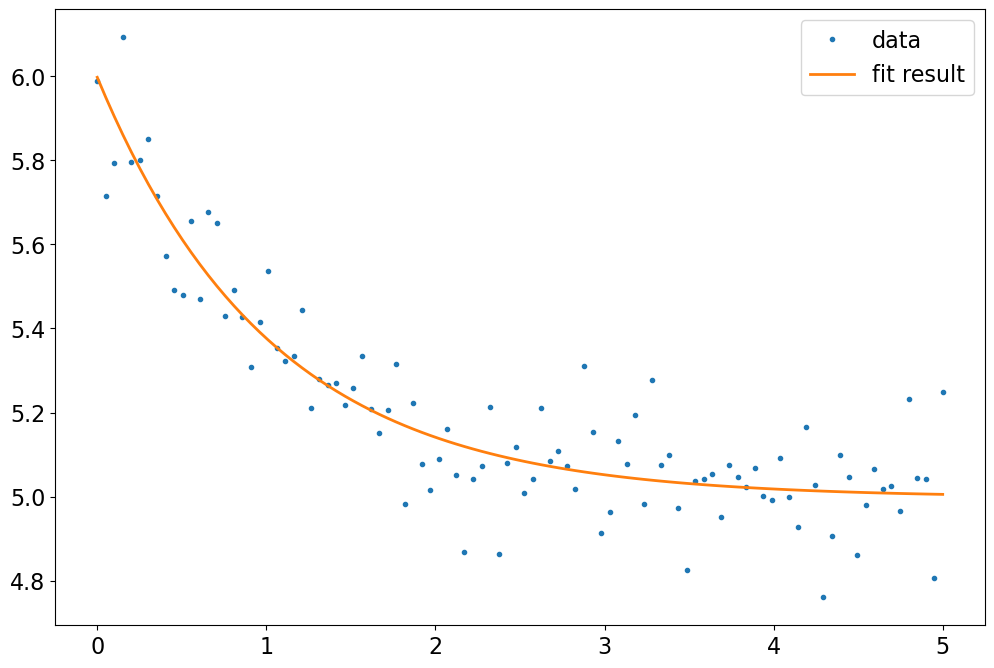

In [11]:
plt.plot(x, y, '.', label='data')
plt.plot(x, f(x, *params), label='fit result')
plt.legend();

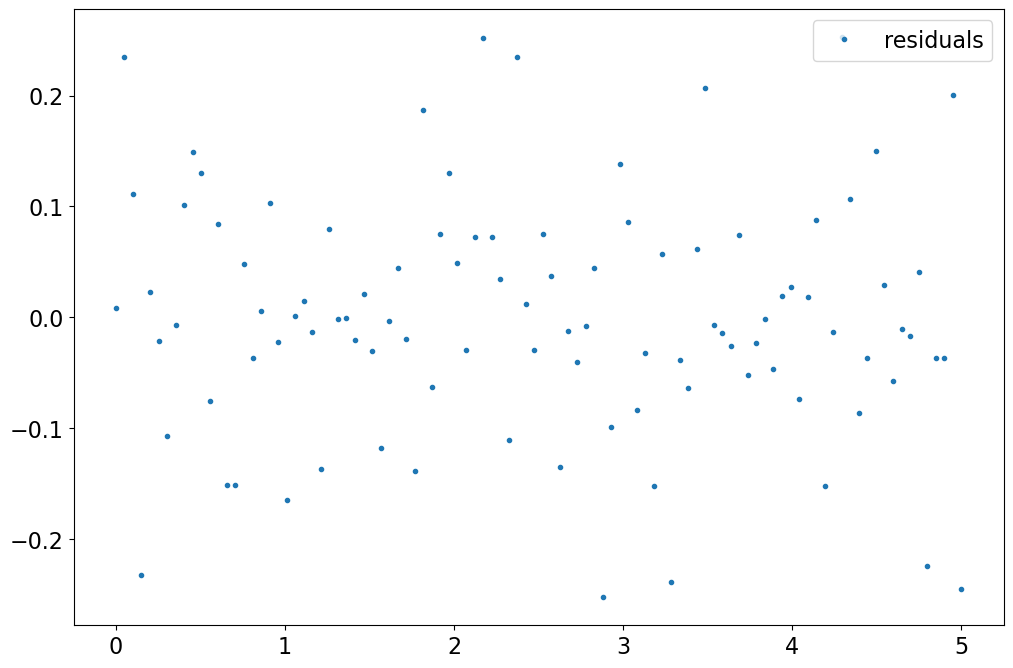

In [12]:
plt.plot(x,f(x, *params)-y,'.', label='residuals' )
plt.legend()

error: 2.759437075148758


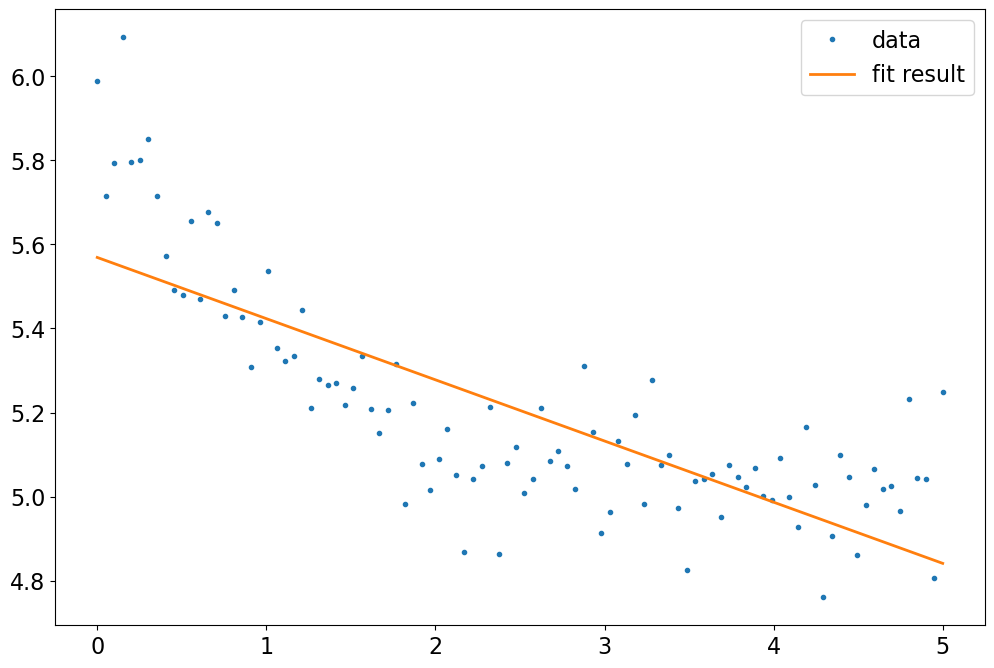

In [13]:
# Linear regression using curve_fit

def f_linear(x, a, b):
    return a*x + b

l_params, l_covariance_matrix = curve_fit(f_linear, x, y)
l_uncertainties = np.sqrt(np.diag(l_covariance_matrix))

plt.plot(x, y, '.', label='data')
plt.plot(x, f_linear(x, *l_params), label='fit result')
plt.legend();

error = ((y - f_linear(x, *l_params))**2).sum()
print('error: {}'.format(error))

In [14]:
# It is possible to check if the result is the same as the one obtained using linear regression.
from scipy.stats import linregress

print('With curve_fit')
print('\ta = {:5.2f} ± {:.2f}'.format(l_params[0], l_uncertainties[0]))
print('\tb = {:5.2f} ± {:.2f}'.format(l_params[1], l_uncertainties[1]))

slope, intercept, r_value, p_value, std_err = linregress(x, y)
print('With linregress')
print('\ta = {:5.2f}'.format(slope))
print('\tb = {:5.2f}'.format(intercept))

With curve_fit
	a = -0.15 ± 0.01
	b =  5.57 ± 0.03
With linregress
	a = -0.15
	b =  5.57


In [ ]:
a = -1
b = 5
c = 5

def f(x, a, b):
    return np.exp(a * x) + b

def f_quadratic(x, a, b, c):
    return a*x**2 + b*x + c

x = np.linspace(0, 5, 100)
y = f(x, a, b) + np.random.normal(0, 0.1, 100)

l_params, l_covariance_matrix = curve_fit(f_quadratic, x, y)
l_uncertainties = np.sqrt(np.diag(l_covariance_matrix))

plt.plot(x, y, '.', label='data')
plt.plot(x, f_quadratic(x, *l_params), label='fit result')
plt.legend();

print('With curve_fit')
print('\ta = {:5.2f} ± {:.2f}'.format(l_params[0], l_uncertainties[0]))
print('\tb = {:5.2f} ± {:.2f}'.format(l_params[1], l_uncertainties[1]))
print('\tc = {:5.2f} ± {:.2f}'.format(l_params[2], l_uncertainties[2]))

error = ((y - f_quadratic(x, *l_params))**2).sum()
print('error: {}'.format(error))

<a id=exercise_1></a>
## Exercise 1

Use `curve_fit` to fit a 4th-degree polynomial to the data, plot the result on a graph, and compare it with the previous fittings.

<a id=uncertainties_guesses></a>
### Uncertainties and initial guess.

In [ ]:
x = np.linspace(0, 1, 1000)
def f(x, a, b):
    return np.sin(a * x + b)

y = f(x, 5 * np.pi, np.pi / 2) 
yerr = np.full_like(y, 0.2)
noise = np.random.normal(0, yerr, 1000)
y += noise


params, covariance_matrix = curve_fit(f, x, y)

# params, covariance_matrix = curve_fit(
#     f, x, y,
#     p0=[15, 2],
# )

# params, covariance_matrix = curve_fit(
#    f, x, y,
#    p0=[15, 1.5],
#    sigma=yerr,
#    absolute_sigma=True,
# )


# plot the stuff

x_plot = np.linspace(-0.1, 1.1, 1000)

plt.plot(x, y, '.', label='data')
plt.plot(x_plot, f(x_plot, *params), label='fit result')
plt.legend();

<a id=minimize></a>
## Optimization of a function using `minimize`

Let's define a function with two local minima.

In [16]:
def f(x, h, x1):
    return h*np.exp(-((x - x1)**2).sum(axis=-1))

def g(x):
    return -f(x, 1, np.array([2, 1])) - f(x, 2, np.array([-2, 3]))

In [17]:
XLIM = [-5, 5]
YLIM = [-2.5, 7.5]
x = np.linspace(-5, 5, 100)
y = np.linspace(-2.5, 7.5, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
Z = g(pos)

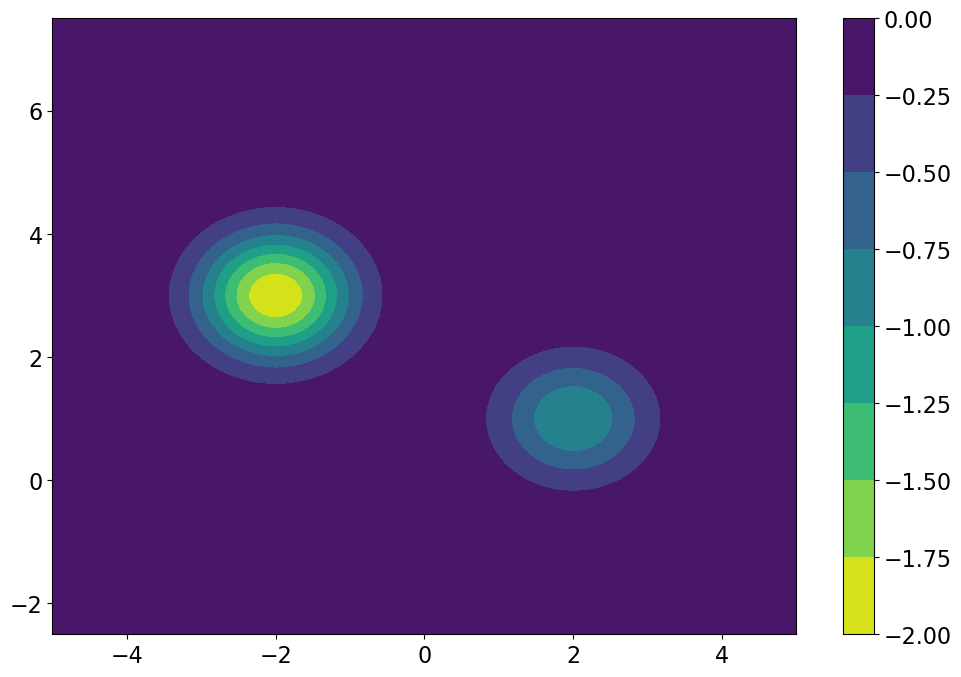

In [18]:
plt.contourf(X, Y, Z, cmap='viridis_r')
plt.colorbar()

In [19]:
from scipy.optimize import minimize

result = minimize(g, x0=(0., 0.)) # initial guess is required

print(result.x)

[1.9999999  0.99999997]


We did not find the global minimum.

In [21]:
result = minimize(g, x0=(-2, 2))
print(result.x)

[-2.0000001   3.00000056]


<a id=likelihood></a>
### Fitting Likelihood Functions

Example: Fitting to a negative, logarithmized likelihood function from the Poisson distribution.

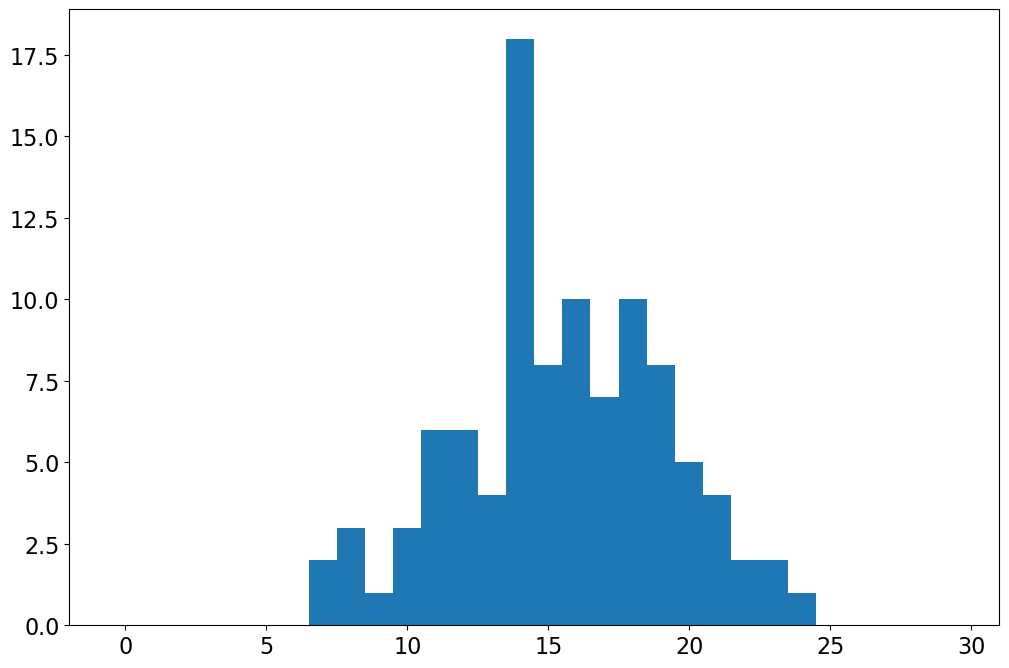

In [22]:
lambda_ = 15
k = np.random.poisson(lambda_, 100)

# You need to use intervals centered around integer numbers.
bin_edges = np.arange(0, 31) - 0.5

plt.hist(k, bins=bin_edges);

Poisson PDF (Probability Density Function):

$$
f(k, \lambda) = \frac{\lambda^k}{k!} \mathrm{e}^{-\lambda}
$$

Likelihood Function:

$$
\mathcal{L} = \prod_{i=0}^{N} \frac{\lambda^{k_i}}{k_i!} \mathrm{e}^{-\lambda}
$$

It is often easier to optimize the logarithm $-\log(\mathcal{L})$. Let's see:

$$
-\log(\mathcal{L}) = - \sum_{i=0}^{N}\bigl( k_i \log(\lambda) - \log{k_i!} - \lambda \bigr)
$$

We are interested in the minimum related to $\lambda$, so we omit the constant terms not associated with it:

$$
-\log(\mathcal{L}) = \sum_{i=0}^{N}\bigl( \lambda - k_i \log(\lambda) \bigr)
$$

Indeed, it is easier to optimize such a function.

In [23]:
def negative_log_likelihood(lambda_, k):
    return np.sum(lambda_ - k * np.log(lambda_))

result = minimize(
    negative_log_likelihood,
    x0=(10, ),   # initial guess
    args=(k, ),  # additional optimization arguments
)

result

print('True λ = {}'.format(lambda_))
print('Fit: λ = {:.2f} ± {:.2f}'.format(result.x[0], np.sqrt(result.hess_inv[0, 0])))

True λ = 15
Fit: λ = 15.48 ± 0.39


* `minimize` has many options for different optimization algorithms.
* Additionally, it can take into account constraints and boundary conditions for some algorithms.
* It is worth writing your own optimization function and simplifying it by logarithmizing it.

<a id=exercise_2></a>
### Exercise 2

Do the same to estimate the parameters of the Gaussian distribution.

Generate a sample from a normal distribution with $\mu = 10$ and $\sigma = 6$.

PDF:

$$
f(x, \mu, \sigma) = \frac{1}{\sqrt{2 \pi}} \mathrm{e}^{-0.5 \frac{(x - \mu)^2}{\sigma^2}}
$$

Optimize the negative, logarithmized likelihood function:

$$
-\log(\mathcal{L}) = -\sum_{i = 0}^N \log\left( \frac{1}{\sqrt{2 \pi}} \mathrm{e}^{-0.5 \frac{(x_i - \mu)^2}{\sigma^2}} \right)
$$

You can use the `norm.rvs` and `norm.pdf` functions to generate the sample and define the optimization function.

True mi = 10 , sig = 6
Fit: mi = 9.99 ± 0.19
Fit: sig = 5.95 ± 0.22


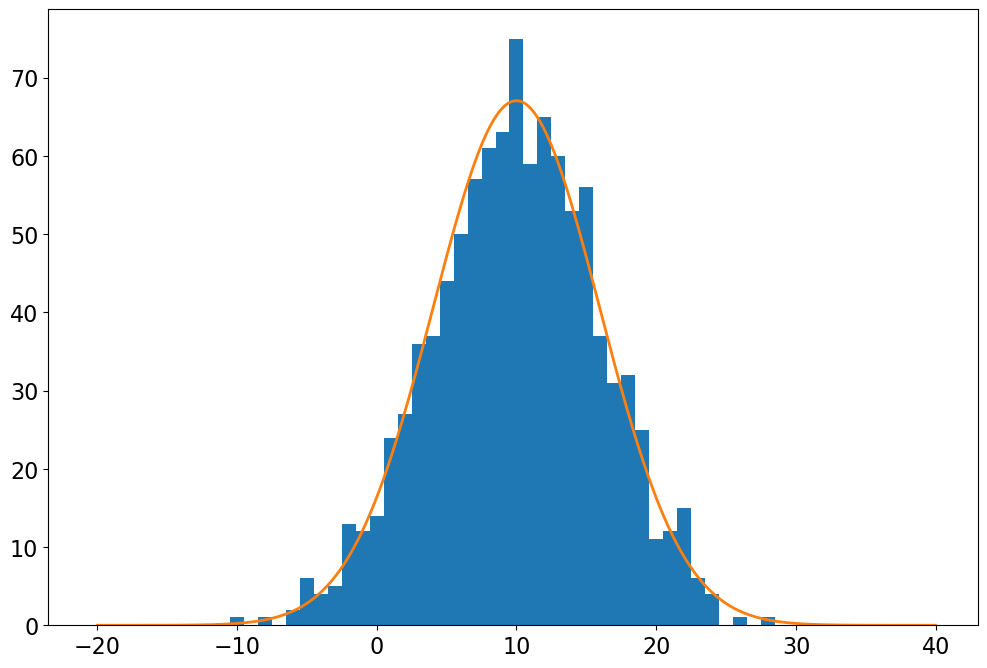

In [25]:
from scipy.stats import norm

mi = 10
sig = 6
x = norm.rvs(mi,sig,1000)
y = norm.pdf(x,loc=mi,scale=sig)
# You need to use intervals centered around integer numbers.
bin_edges = np.arange(-20, 40) - 0.5


plt.hist(x, bins=bin_edges)
# plt.figure()
# plt.plot(x,y)

def negative_log_likelihood(p, x):
    mi,sig= p
    return - np.sum(np.log(norm.pdf(x,loc=mi,scale=sig)))

result = minimize(
    negative_log_likelihood,
    x0=(mi,sig, ),   # initial guess
    args=(x, ),  # Additional optimization arguments.
    # bounds = [
    #   (None, None),
    #   (0.0, np.inf)
    # ],
)

result
xx = np.linspace(-20, 40, 1000)
plt.plot(xx, 1000*norm.pdf(xx,loc=result.x[0],scale=result.x[1]))

hess_inv= result.hess_inv
if not isinstance(hess_inv, np.ndarray):
    hess_inv= hess_inv.todense()

print('True mi = {} , sig = {}'.format(mi,sig))
print('Fit: mi = {:.2f} ± {:.2f}'.format(result.x[0], np.sqrt(hess_inv[0, 0])))
print('Fit: sig = {:.2f} ± {:.2f}'.format(result.x[1], np.sqrt(hess_inv[1, 1])))

<a id=fft></a>
# Fast Fourier Transforms (FFTs)

In [26]:
freq1 = 4.9
freq2 = 7.9
N = 81001
n_harm = 15
t = np.linspace(1.2, 40.1, N)
# y = 6.1*np.sin(2*np.pi*freq1*t) + 4.2*np.sin(2*np.pi*freq2*t)

harms = np.linspace(1, n_harm, n_harm, endpoint=True)
y = np.sum([2**(n_harm-i+1)*np.sin(2*np.pi*freq1*i*t)/(2**(n_harm))*101 for i in harms], axis=0)

# add noise
noisy_y = y + np.random.normal(np.full_like(y, 0.), 5)

Text(0.5, 0, '$t \\ \\ [\\mathrm{d}]$')

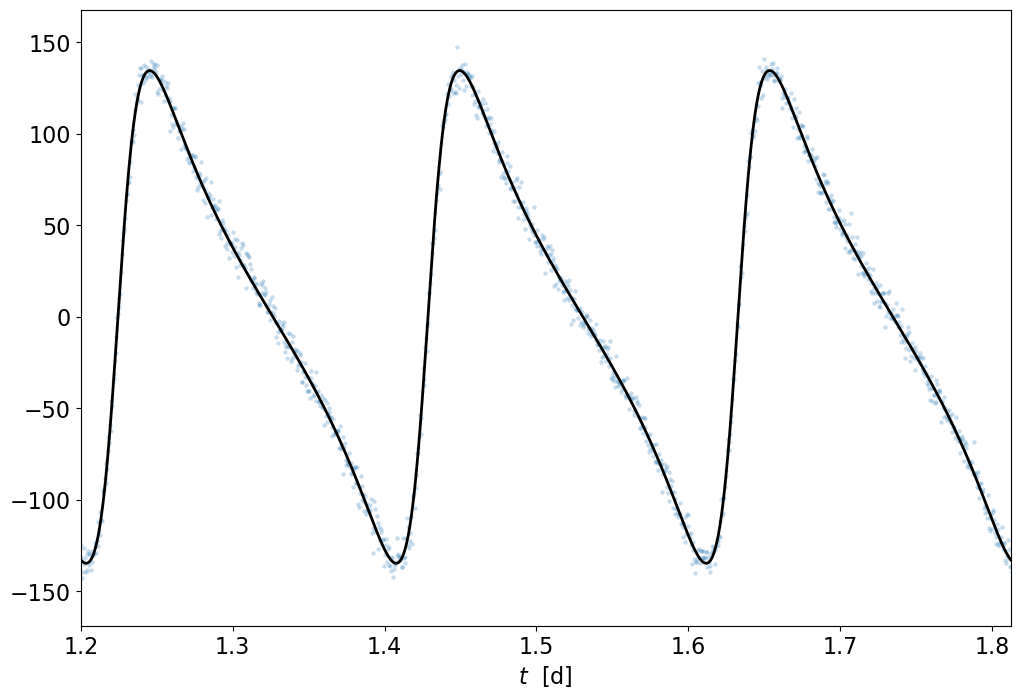

In [27]:
# %matplotlib inline
plt.scatter(t, noisy_y, s=10, alpha=0.25, lw=0)
plt.plot(t, y, c='k')
plt.xlim(1.2, 1.2+3*(1/freq1))
plt.xlabel(r'$t \ \ [\mathrm{d}]$')

In [28]:
from scipy import fft

In [31]:
step = 1/(10*(t[-1]-t[0]))
nyq = 1/(2*(t[1]-t[0]))
size = int(nyq/step)*2

print(N, nyq, step, size)

81001 1041.1311053983761 0.002570694087403599 809998


Text(0, 0.5, 'Amplitude [$mmag$]')

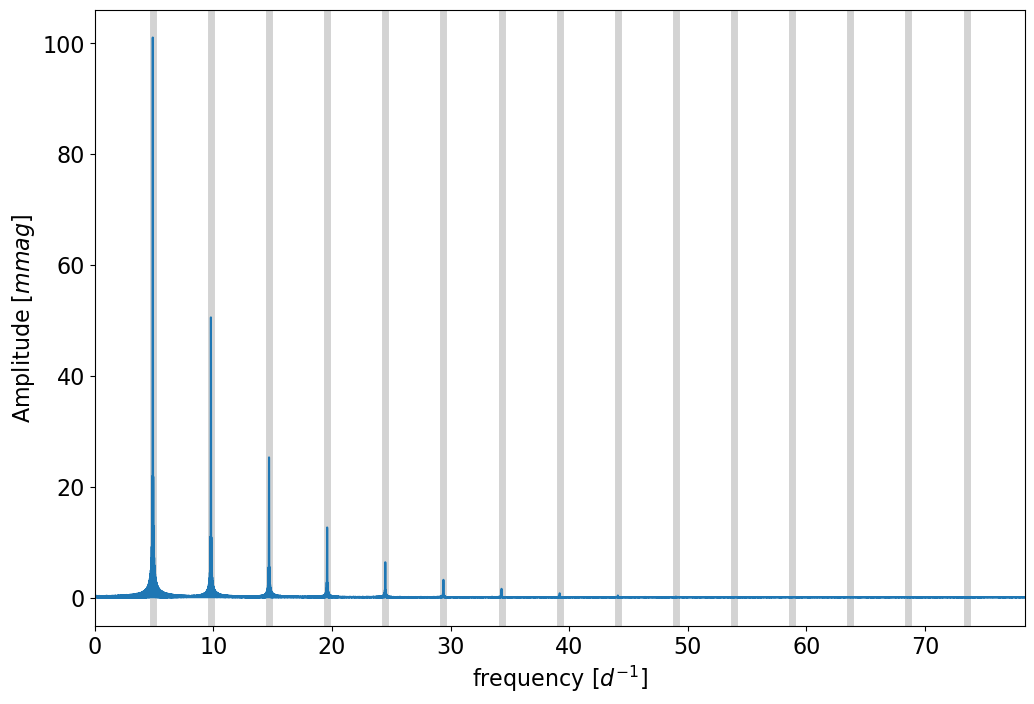

In [32]:
# %matplotlib inline

z = fft.fft(noisy_y, size)
f = fft.fftfreq(size, t[1] - t[0])

z = fft.fft(noisy_y, size)
f = fft.fftfreq(size, t[1] - t[0])

# plt.axvline(freq1, color='lightgray', lw=5)
# plt.axvline(freq2, color='lightgray', lw=5)
[plt.axvline(i*freq1, color='lightgray', lw=5) for i in harms]

# plt.xlim(0,20)
plt.xlim(0,(n_harm+1)*freq1)
plt.plot(f, 2/N*np.abs(z), lw=1.5) #np.abs(z)**2
plt.xlabel('frequency [$d^{-1}$]')
plt.ylabel('Amplitude [$mmag$]')
# plt.xscale('log')
# plt.yscale('log')

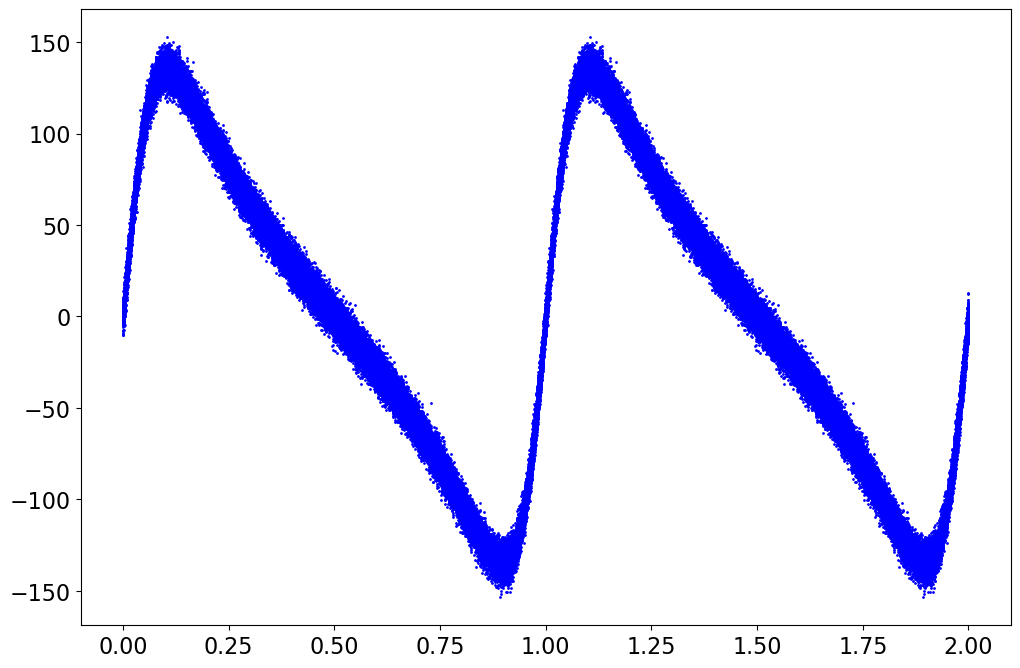

In [33]:
# %matplotlib notebook
n_ph = 2
phases = (np.tile(t%(1/freq1)/(1/freq1), (n_ph,1)).T+np.arange(n_ph)).T

plt.plot(phases.flatten(), np.tile(noisy_y, n_ph), 'ob', ms=1)
# plt.plot(t%(1/freq2)/(1/freq2),noisy_y, 'or', ms=1)

<a id=integration></a>
# Integration

You can read about different integration methods in the [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html).

<a id=function_integration></a>
## Function Integration

`quad` is used for finite 1D numerical integration using a Fortran-based integration routine from the QUADPACK library.

Example:
Let's define the function to integrate as a quadratic polynomial $f(x) = 3x^2 + 6x - 9$ over the interval $x \in [0, 5]$. Analytically, we have:

$$ \int_0^5 3x^2 + 6x - 9 \ dx = \left[ x^3 + 3x^2 - 9x \right]_{x = 0}^{x = 5} = 155 $$

In [34]:
from scipy.integrate import quad

def f(x):
    return 3*x**2 + 6*x - 9

quad(f, 0, 5)

(155.0, 1.832332444897697e-12)

The first returned parameter of the `quad` function is the result, and the second one is the error estimate.

For 2D, 3D, and n-D integrals, you can use `dblquad`, `tplquad`, or `nquad` respectively.

Other integration methods available in SciPy include:

* `quadrature`: [Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature)
* `romberg`: [Romberg integration](https://en.wikipedia.org/wiki/Romberg%27s_method)

For example, let's consider the sinc function:

$$
\mathrm{sinc}(x) \equiv
\begin{cases} 
1 & x = 0 \\
\frac{\sin(x)}{x} & \text{otherwise}
\end{cases}
$$

Text(-10, 0.8, '$ \\int_{-10}^{10} \\mathrm{sinc}(x) \\ dx = 0.9798$ ?')

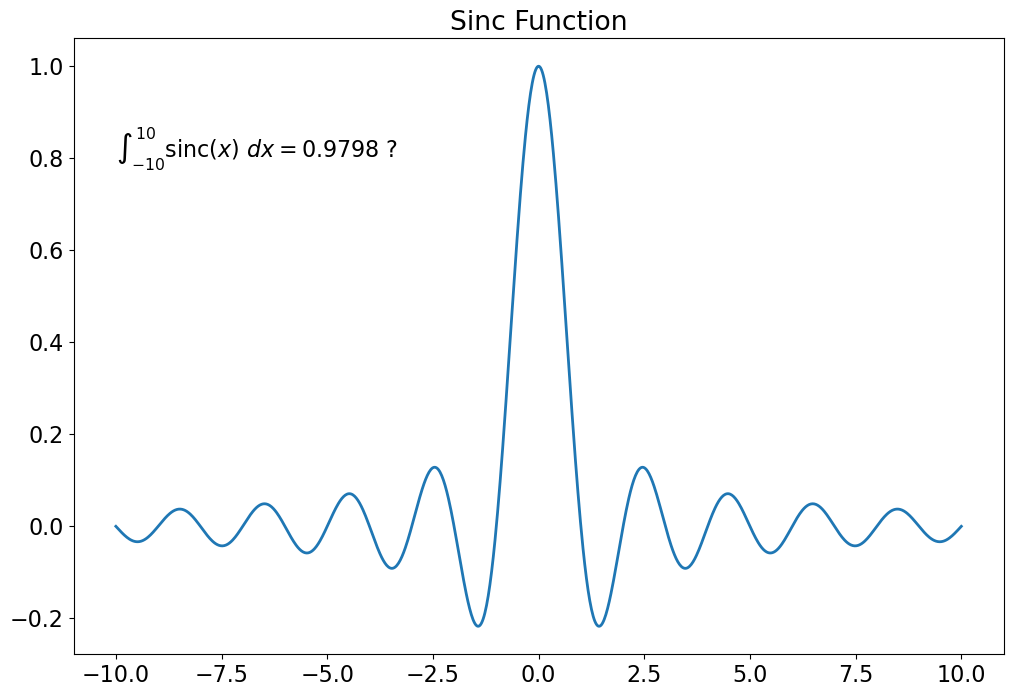

In [35]:
# %matplotlib notebook
x = np.linspace(-10, 10, 1000)
y = np.sinc(x)
plt.plot(x, y)
plt.title('Sinc Function')

res = quad(np.sinc, -10, 10)

plt.text(-10, 0.8, r'$ \int_{{-10}}^{{10}} \mathrm{{sinc}}(x) \ dx = {result:.4f}$ ?'.format(result=res[0]))

You can also calculate the same using Gaussian quadrature:

In [36]:
from scipy.integrate import quadrature

print(quadrature(np.sinc, -10, 10)[0])

0.9797763434659162


<a id=sample_integration></a>
## Sample Integration

You can use an [interpolating function](#interpolation) and pass it to the `quad` function. A better alternative is to use specialized functions: `trapz`, `romb`, and `simps`.

Let's consider the sinc function again. The simplest but also effective method for integration is the trapezoidal rule, which can be implemented using the `trapz` function.

In [37]:
from scipy.integrate import trapz

# 50 points
x = np.linspace(-10, 10)
y = np.sinc(x)
print('  50 points:', trapz(y, x))   # first y, then x: y, x

# 1000 points
x = np.linspace(-10, 10, 1000)
y = np.sinc(x)
print('1000 points:', trapz(y, x))

  50 points: 0.9826316326559502
1000 points: 0.9797830227655555


<a id=exercise_3></a>
### Exercise 3

Apply the `trapz` function to calculate the integral:

$$
\int_{-4}^{4} \sqrt[3]{(1 - x^3)} dx
$$

**Hint:** Use the `np.cbrt` function.

(2.4698782693408057, 0.03754552872732697)
2.483562933897187


/Users/krzkot/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.754553e-02
  warnings.warn(


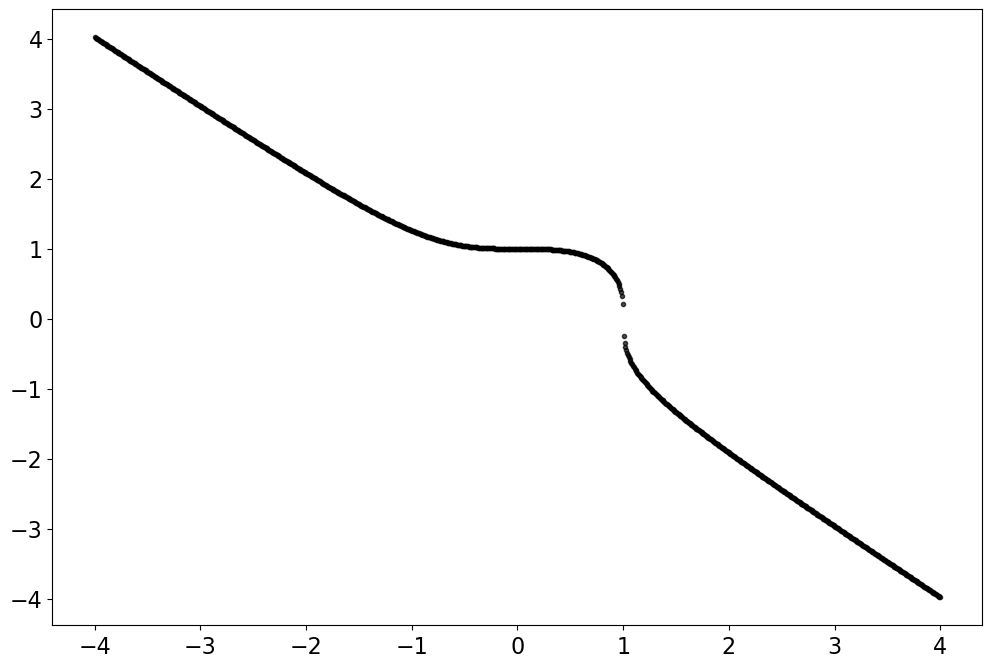

In [38]:
# %matplotlib notebook
from scipy.integrate import quadrature
from scipy.integrate import trapz

# f = lambda x: np.cbrt(1-np.power(x,3))

def f(x):
   return np.cbrt(1-np.power(x,3))

print(quadrature(f, -4, 4))

x = np.linspace(-4, 4,1000)
y = f(x)

print(trapz(y,x))
plt.plot(x,y, 'ok', ms=3, alpha=0.7)

### <a id=interpolation></a>
# Interpolation

<a id=linear_interpolation></a>
## Linear interpolation

Interpolation between two points $(x_0, y_0)$ and $(x_1, y_1)$ can be performed using the following formula:

$$y(x) = y_0 + (x - x_0) \frac{y_1 - y_0}{x_1 - x_0}$$

It seems simple, but it can become cumbersome. Additionally, what if we want the values to be equal to $y_0$ for arguments smaller than $x_0$ and similarly for arguments larger than $x_1$? We would need to use `if` statements and consider other cases.

Instead, we can use a convenient function from the `scipy.interpolate` module - `interp1d`.

In [45]:
from scipy.interpolate import interp1d

x = (1, 2)
y = (5, 7)
print('Points:', list(zip(x, y)))

f = interp1d(x, y)
z = [1.25, 1.5, 1.75]
print('Interpolation:', list(zip(z, f(z))))

Points: [(1, 5), (2, 7)]
Interpolation: [(1.25, 5.5), (1.5, 6.0), (1.75, 6.5)]


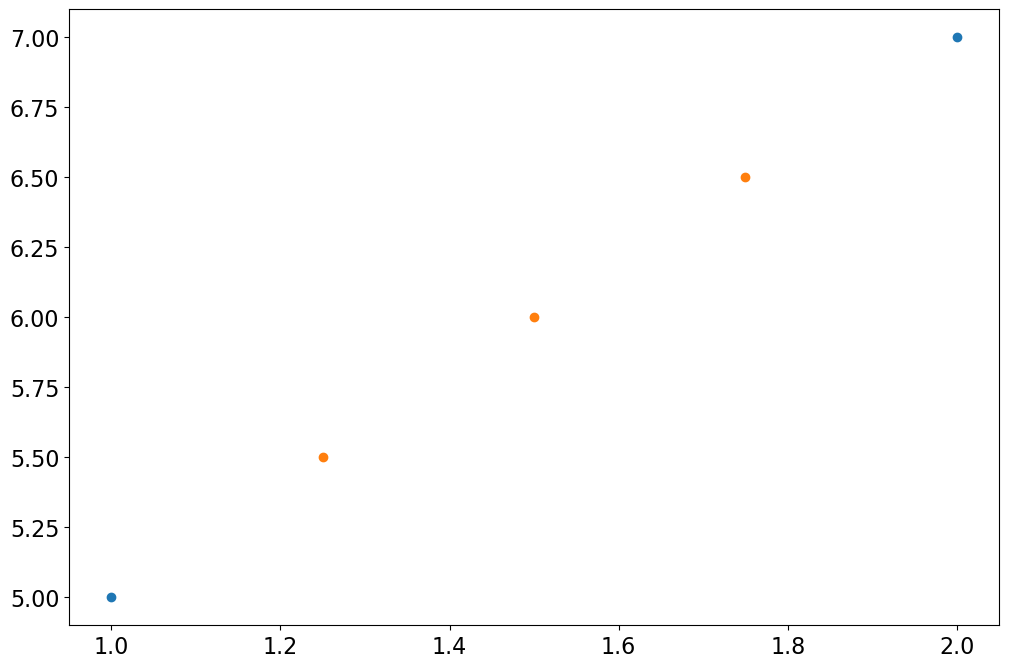

In [46]:
plt.scatter(x, y)
plt.scatter(z, f(z))

Currently, if we try to use an x-coordinate outside the interval $[x_0, x_1]$, a `ValueError` will be raised.

In [48]:
# f(2.5)   # uncomment

That's because we didn't specify how `interp1d` should handle the boundaries. This can be done using the `fill_value` argument, which has several options:

1. Values outside the interval $[x_0, x_1]$ will be of type `float`.
2. Values $< x_0$ go to `below` and values $> x_1$ go to `above` by passing a tuple, `(below, above)`.
3. Extrapolation of points outside the interval by passing `extrapolate`.

Additionally, we need to instruct `interp1d` not to raise a `ValueError` by assigning `False` to the `bounds_error` argument.

In [49]:
z = [0.5, 1, 1.5, 2, 2.5]

f_a = interp1d(x, y, bounds_error=False, fill_value=0)   # Fill with the same value on both sides.
print("Opcja nr 1:", list(zip(z, f(z))))

f_b = interp1d(x, y, bounds_error=False, fill_value=y)   # fill with value (below, above)
print("Opcja nr 2:", list(zip(z, f(z))))

f_c = interp1d(x, y, fill_value='extrapolate')   # extrapolation, where bounds_error automatically has value False
print("Opcja nr 3:", list(zip(z, f(z))))

ValueError: A value (0.5) in x_new is below the interpolation range's minimum value (1).

In [ ]:
plt.scatter(z, f_c(z))
plt.scatter(x, y)

<a id=spline_interpolation></a>
## Cubic Spline Interpolation

[Cubic splines](http://mathworld.wolfram.com/CubicSpline.html) are commonly used for smooth interpolation between data points.

They are so popular that they have their own implementation, `CubicSpline`, which typically provides better results.

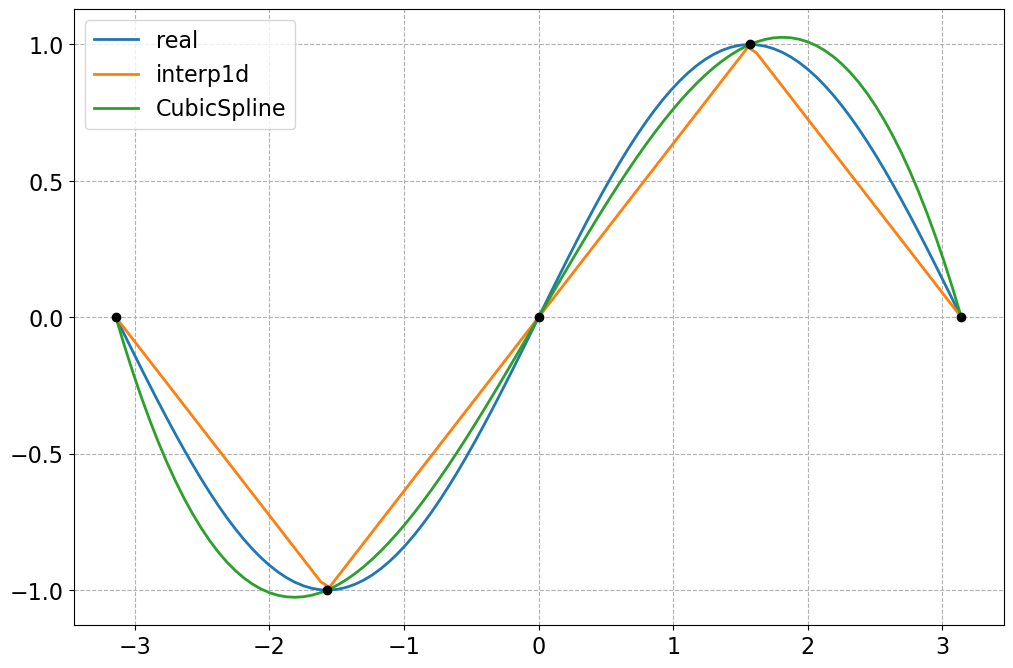

In [50]:
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

# Create sample of sines
sample_x = np.linspace(-np.pi, np.pi, 5)
sample_y = np.sin(sample_x)

# Draw sine
z = np.linspace(np.min(sample_x), np.max(sample_x), 100)
plt.plot(z, np.sin(z), label='real')

# interpolation 1D
f1 = interp1d(sample_x, sample_y)
plt.plot(z, f1(z), label='interp1d')

# spline of 3rd degree
f2 = CubicSpline(sample_x, sample_y)
plt.plot(z, f2(z), label='CubicSpline')

plt.plot(sample_x, sample_y, 'ko')
plt.legend();
plt.grid(linestyle='--');

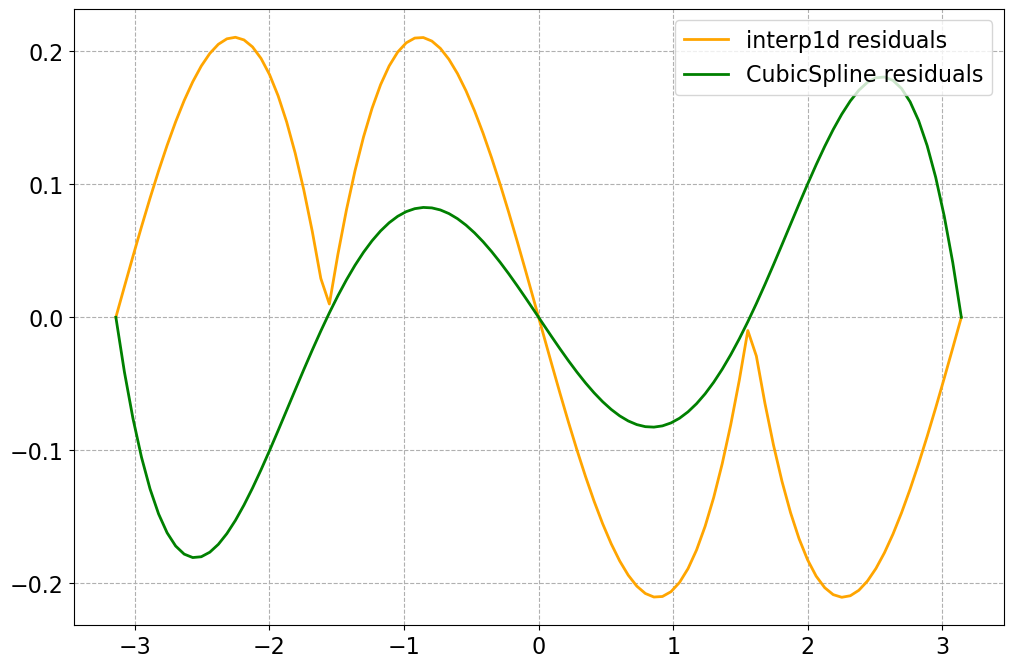

In [51]:
plt.plot(z, f1(z)-np.sin(z), label='interp1d residuals', color='orange')
plt.plot(z, f2(z)-np.sin(z), label='CubicSpline residuals', color='green')
plt.legend();
plt.grid(linestyle='--');

It is also possible to perform interpolation in two or more-dimensional spaces (with certain limitations).

Please refer to the [interpolation documentation](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate) for more information.

<a id=exercise_4></a>
## Exercise 4

Perform interpolation of the sinc function:
* with two samples: 10 points and 100 points
* using linear interpolation and cubic spline interpolation
* over the interval [-10, 10]

<a id=stats></a>
# Statistics

The `scipy.stats` module provides mainly:
* probability distributions: continuous, discrete, and multivariate
* statistical functions and tests

You can find more information in the [documentation of the `stats` module](https://docs.scipy.org/doc/scipy/reference/stats.html).

In [52]:
from scipy import stats

<a id=stats_distributions></a>
## Probability Distributions

There are three types of probability distributions:
* Continuous
* Discrete
* Multivariate

Each of them belongs to the same class, so they have the same methods.

<a id=continuous_distributions></a>
### Continuous Distributions

There are approximately 100 different continuous probability distributions. Some of the methods that can be applied to them are:
* `cdf`: Cumulative Distribution Function
* `pdf`: Probability Density Function
* `rvs`: Random Variable Sample
* `ppf`: Percent Point Function (inverse of the cumulative distribution function)
* `fit`: returns maximum likelihood estimators for location, scale, and shape

Text(0, 0.5, '$ f(x) =  \\frac{1}{\\sqrt{2 \\pi}} \\mathrm{e}^{-\\frac{1}{2} x^2}}$')

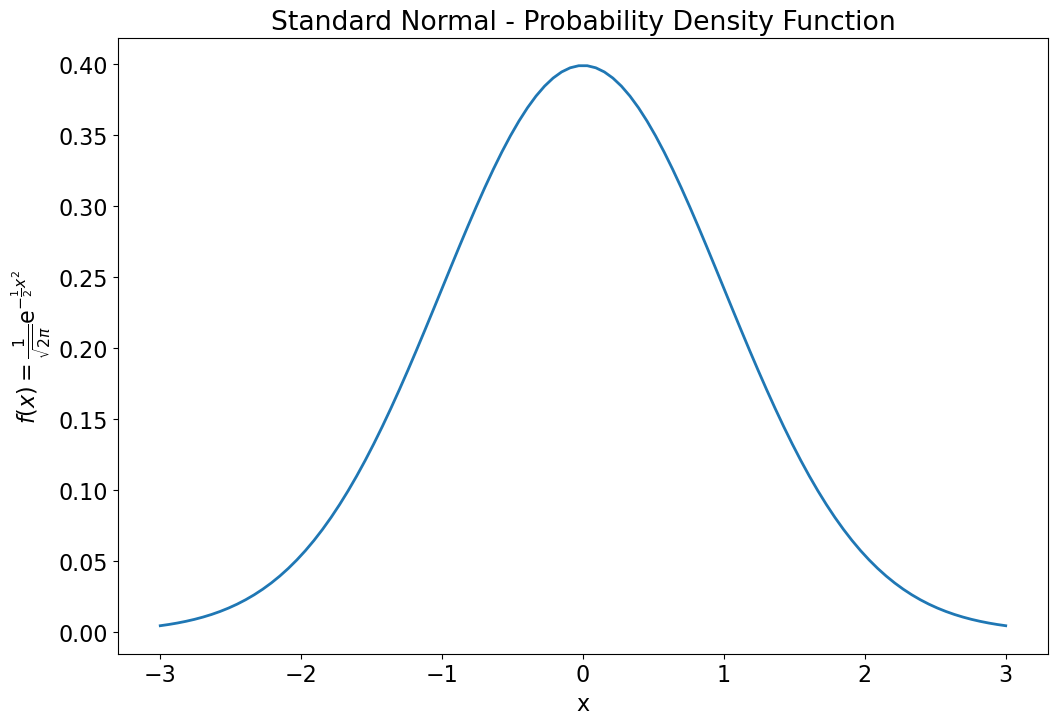

In [53]:
std_normal = stats.norm()

x = np.linspace(-3, 3, 100)
plt.plot(x, std_normal.pdf(x))
plt.title('Standard Normal - Probability Density Function')
plt.xlabel('x')
plt.ylabel(r'$ f(x) =  \frac{1}{\sqrt{2 \pi}} \mathrm{e}^{-\frac{1}{2} x^2}}$')

Text(0, 0.5, '$ F(x) =  \\frac{1}{\\sqrt{2 \\pi}} \\int_{-\\infty}^{x}\\mathrm{e}^{-\\frac{1}{2} x^2}}$')

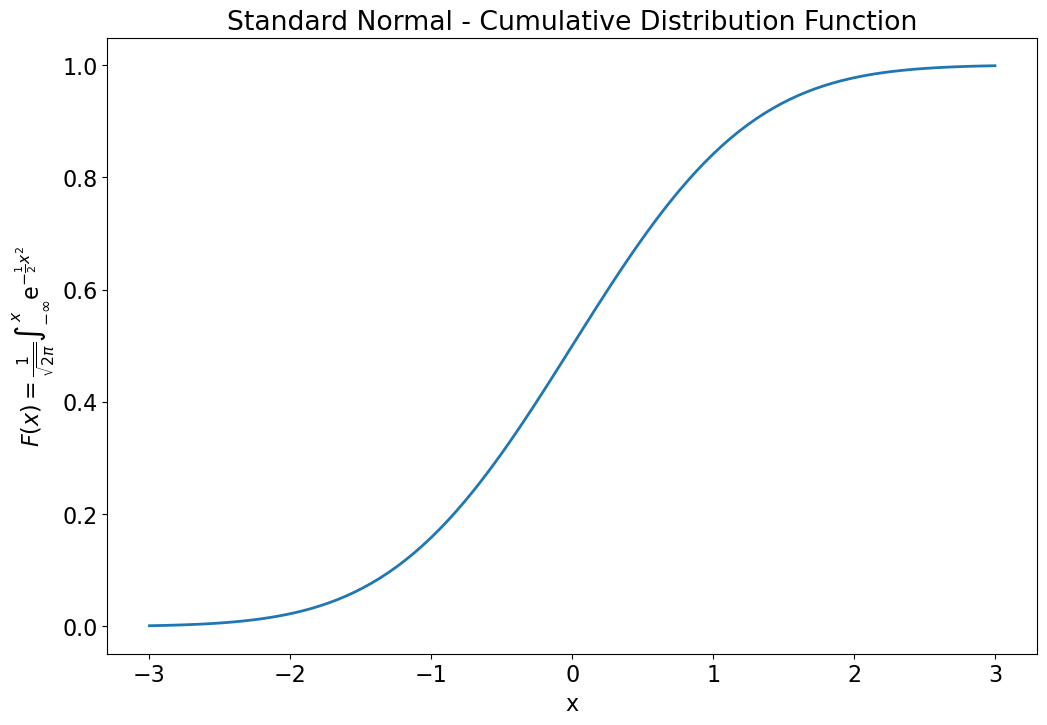

In [54]:
plt.plot(x, std_normal.cdf(x))
plt.title('Standard Normal - Cumulative Distribution Function')
plt.xlabel('x')
plt.ylabel(r'$ F(x) =  \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x}\mathrm{e}^{-\frac{1}{2} x^2}}$')

Text(0.5, 0, 'x')

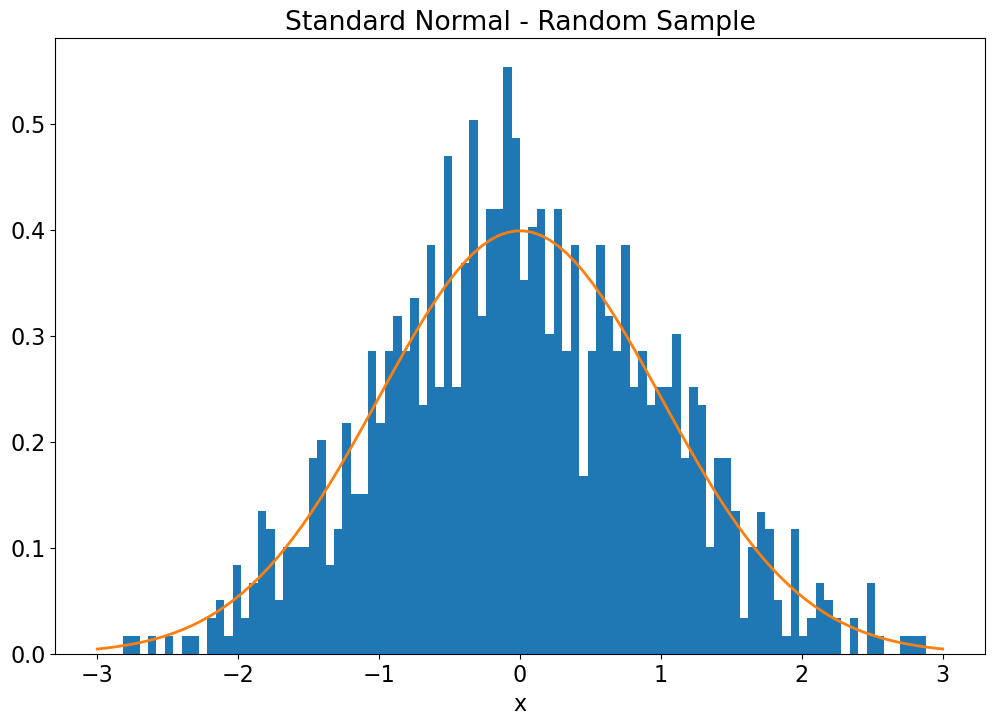

In [55]:
x_sample = std_normal.rvs(1000)
hist_result = plt.hist(x_sample, range=[-3, 3], bins=100, density=True)
x_plot = np.linspace(-3, 3, 100)
plt.plot(x_plot, std_normal.pdf(x_plot))
plt.title('Standard Normal - Random Sample')
plt.xlabel('x')

In [56]:
# Estimators of mean and standard deviation
stats.norm.fit(x_sample)

(0.03772172453303549, 1.0054507432463917)

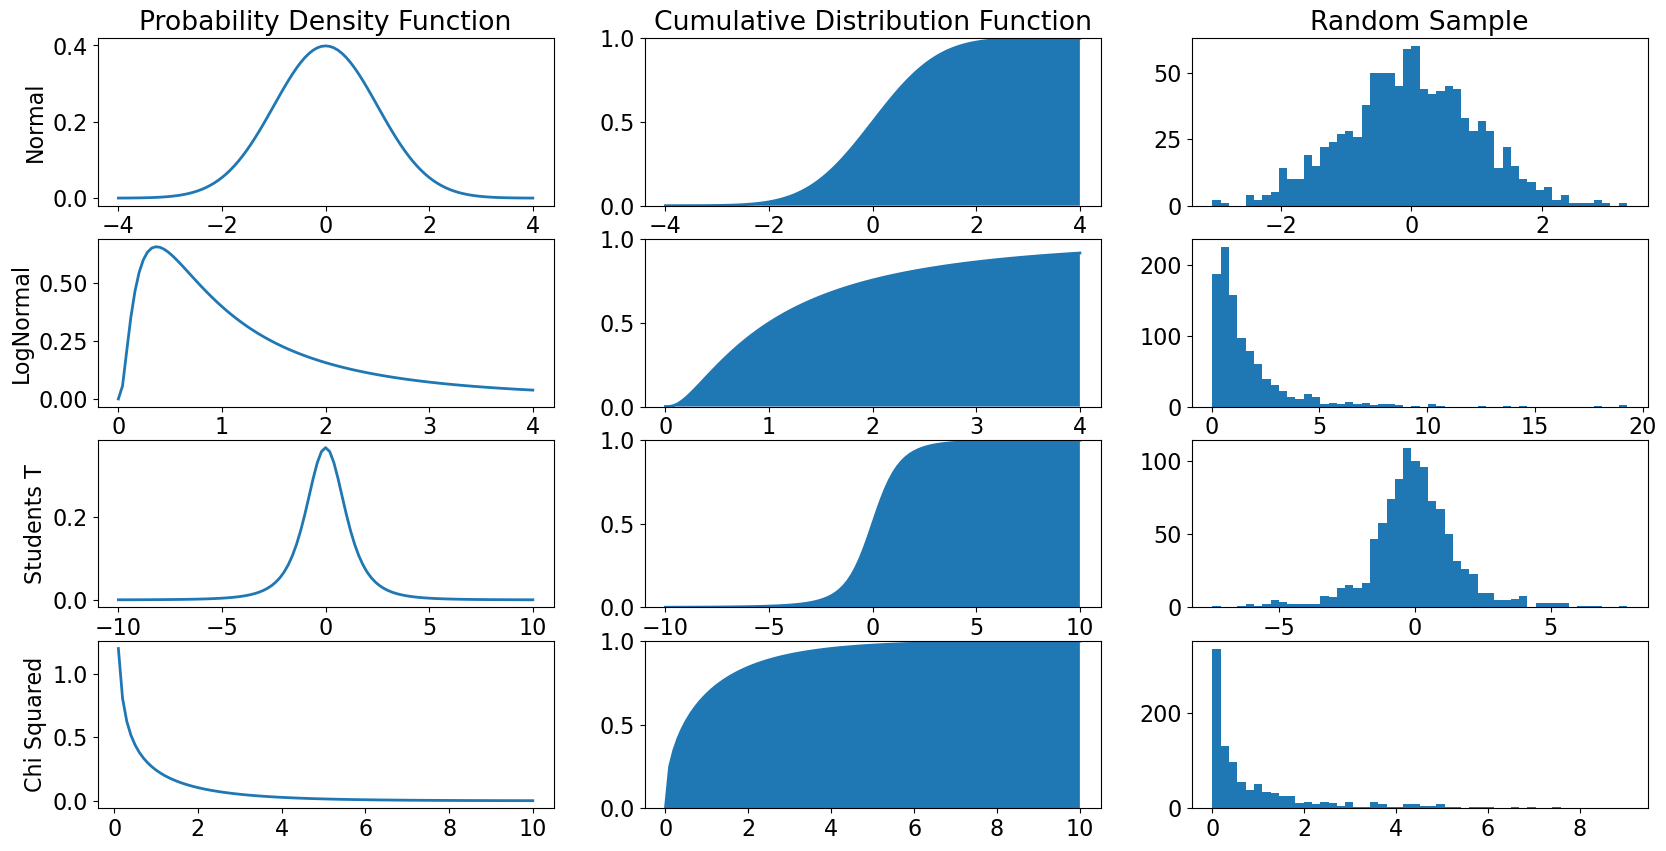

In [57]:
N_SAMPLES = 1000

# Name of the distribution, class, Range of values to plot
pds = [('Normal', stats.norm(), (-4., 4.)), 
      ('LogNormal', stats.lognorm(1.), (0., 4.)),
      ('Students T', stats.t(3.), (-10., 10.)),
      ('Chi Squared', stats.chi2(1.), (0., 10.))]

n_pds = len(pds)
fig, ax_list = plt.subplots(n_pds, 3, figsize=(5.*n_pds, 10.))
for ind, elem in enumerate(pds):
    
    pd_name, pd_func, pd_range = elem

    x_range = np.linspace(*pd_range, num=101)
    
    # Probability density function
    ax_list[ind, 0].plot(x_range, pd_func.pdf(x_range))
    ax_list[ind, 0].set_ylabel(pd_name)
    
    # Cumulative distribution function
    ax_list[ind, 1].plot(x_range, pd_func.cdf(x_range))
    ax_list[ind, 1].fill_between(x_range, pd_func.cdf(x_range))
    ax_list[ind, 1].set_ylim([0., 1.])
    
    # random sample
    ax_list[ind, 2].hist(pd_func.rvs(size=N_SAMPLES), bins=50)
    
    if ind == 0:
        _ = ax_list[ind, 0].set_title('Probability Density Function')
        _ = ax_list[ind, 1].set_title('Cumulative Distribution Function')
        _ = ax_list[ind, 2].set_title('Random Sample')

<a id=discrete_distributions></a>
### Discrete Distributions
Almost the same, but instead of `pdf`, we have `pmf` which stands for Probability Mass Function.

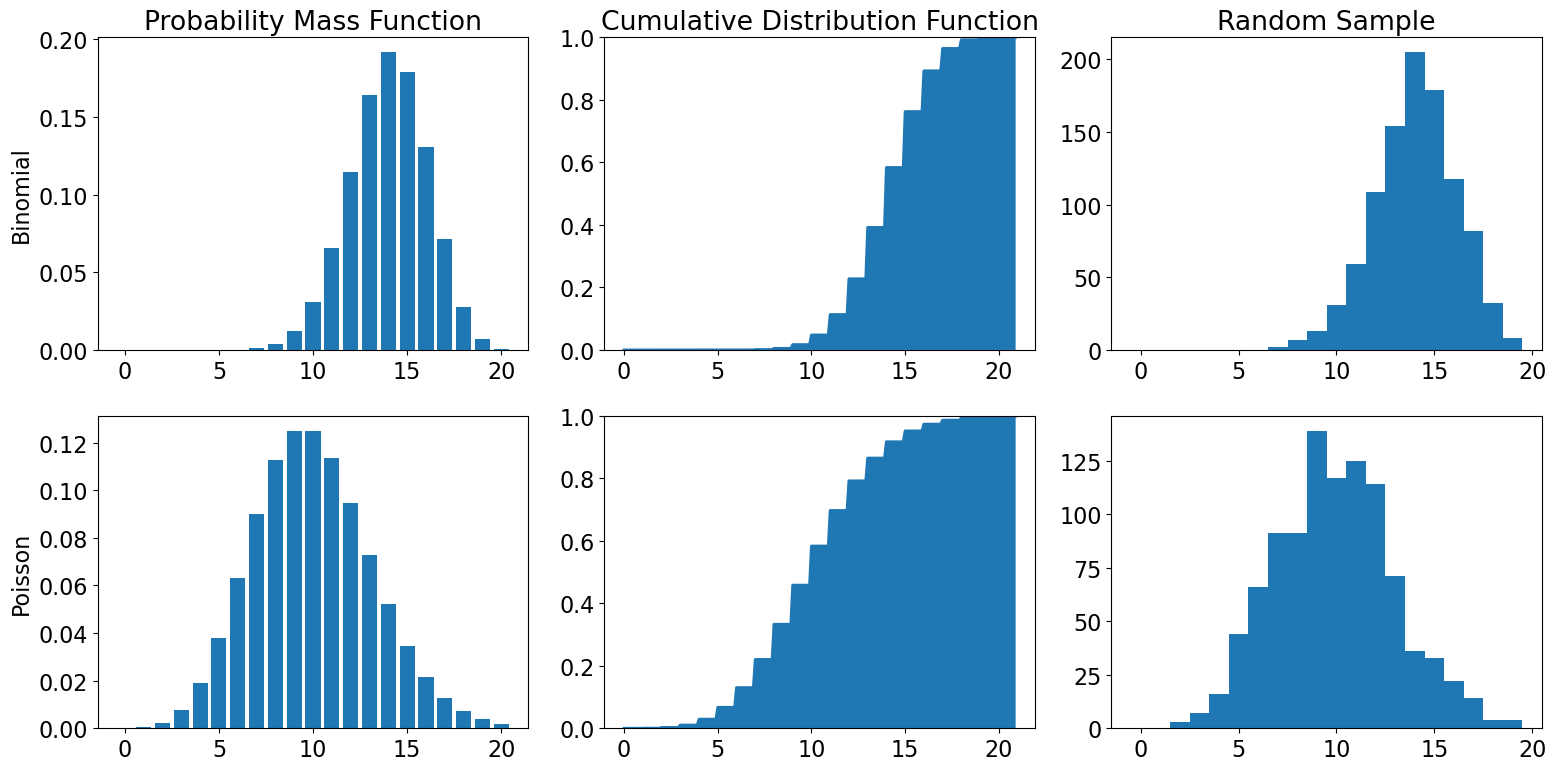

In [58]:
N_SAMPLES = 1000

pds = [('Binomial', stats.binom(20, 0.7), (0., 21.)),
      ('Poisson', stats.poisson(10.), (0., 21.))]

n_pds = len(pds)
fig, ax_list = plt.subplots(n_pds, 3)
fig.set_size_inches((8.*n_pds, 8.))
for ind, elem in enumerate(pds):
    
    pd_name, pd_func, pd_range = elem

    x_range = np.arange(*pd_range)
    x_range_cdf = np.arange(*pd_range,0.1)

    # Funkcja masy prawdopodobieństwa
    ax_list[ind, 0].bar(x_range, pd_func.pmf(x_range))
    ax_list[ind, 0].set_ylabel(pd_name)
    
    # Dystrybuanta
    ax_list[ind, 1].plot(x_range_cdf, pd_func.cdf(x_range_cdf))
    ax_list[ind, 1].fill_between(x_range_cdf, pd_func.cdf(x_range_cdf))
    ax_list[ind, 1].set_ylim([0., 1.])
    
    # losowa próbka
    ax_list[ind, 2].hist(pd_func.rvs(size=N_SAMPLES), bins=x_range - 0.5)
    
    if ind == 0:
        _ = ax_list[ind, 0].set_title('Probability Mass Function')
        _ = ax_list[ind, 1].set_title('Cumulative Distribution Function')
        _ = ax_list[ind, 2].set_title('Random Sample')
        
plt.tight_layout()

<a id=multivariate_distributions></a>
### Multivariate distributions

In [59]:
mult_mean = [0.1, 2.]
mult_cov =  [[2.0, 0.3], 
             [0.3, 0.5]]
mult_norm = stats.multivariate_normal(mean=mult_mean, cov=mult_cov)

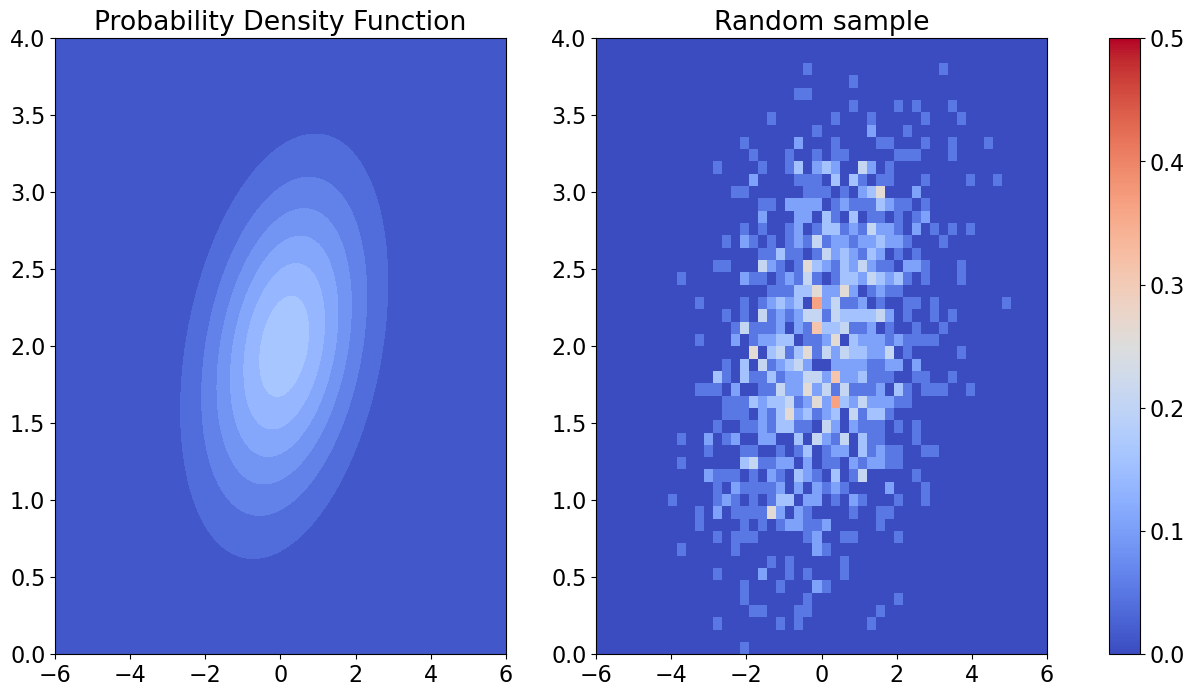

In [60]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

XLIM = [-6., 6.]
YLIM = [0., 4.]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16., 8.))

# Make data.
x = np.linspace(*XLIM, num=100)
y = np.linspace(*YLIM, num=100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
Z = mult_norm.pdf(pos)
S = mult_norm.rvs(1000)

color_norm = colors.Normalize(vmin=0, vmax=0.5)

# Contour plot of the PDF
ax1.contourf(X, Y, Z, cmap='coolwarm', norm=color_norm)
ax1.set_title('Probability Density Function')


# 2D histogram of the random sample
h = ax2.hist2d(S[:, 0], S[:, 1], bins=50, density=True, 
               cmap='coolwarm', range=[XLIM, YLIM],
              norm=color_norm)
ax2.set_title('Random sample')

# Add a common color bar
fig.colorbar(h[3], ax=[ax1, ax2]);

<a id=statistical_functions></a>
## Statistical functions

### Normality Test

Used to check if a sample follows a normal distribution.

In [63]:
x_sample = stats.norm().rvs(size=1000)

alpha = 1e-3

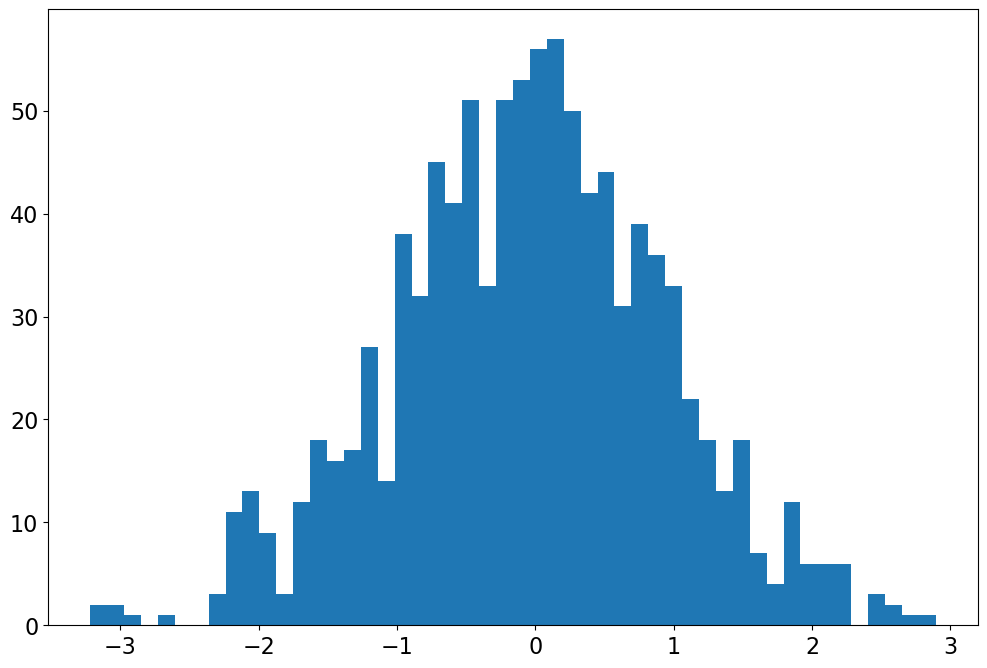

In [64]:
plt.hist(x_sample, bins=50);

`normaltest`: checks if a sample follows a normal distribution

In [65]:
def print_result(p, alpha):
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis H0: x follows a normal distribution
        print("H0 rejected")
    else:
        print("H0 not rejected")

In [66]:
k2, p = stats.normaltest(x_sample)
print_result(p, alpha)

p = 0.571859
H0 not rejected


### Kolmogorov-Smirnov test

It checks whether a sample comes from a given distribution.

In [67]:
l = x_sample.mean()
s = x_sample.std(ddof=1)
print('loc={} scale={}'.format(l, s))

k, p = stats.kstest(x_sample, stats.norm(l, s).cdf)
print_result(p, alpha)


loc=-0.04634692604360298 scale=0.9816485301394796
p = 0.763762
H0 not rejected


And much more...
See [docs](https://docs.scipy.org/doc/scipy/reference/stats.html)

<a id=stats_example></a>
## Example

In [68]:
import os
import matplotlib.pyplot as plt

In [69]:
import pandas as pd
data_path = os.path.join("..","data","scipy_data","stock.csv")
df_prices = pd.read_csv(data_path)
df_prices.head(10)

,Date,Apple,Microsoft,Intel,IBM,Facebook,Google
0,2015-12-31,105.260002,55.480000,34.450001,137.619995,104.660004,758.880005
1,2016-01-04,105.349998,54.799999,33.990002,135.949997,102.220001,741.840027
2,2016-01-05,102.709999,55.049999,33.830002,135.850006,102.730003,742.580017
3,2016-01-06,100.699997,54.049999,33.080002,135.169998,102.970001,743.619995
4,2016-01-07,96.449997,52.169998,31.840000,132.860001,97.919998,726.390015
5,2016-01-08,96.959999,52.330002,31.510000,131.630005,97.330002,714.469971
6,2016-01-11,98.529999,52.299999,32.060001,133.229996,97.510002,716.030029
7,2016-01-12,99.959999,52.779999,32.680000,132.899994,99.370003,726.070007
8,2016-01-13,97.389999,51.639999,31.910000,131.169998,95.440002,700.559998
9,2016-01-14,99.519997,53.110001,32.740002,132.910004,98.370003,714.719971


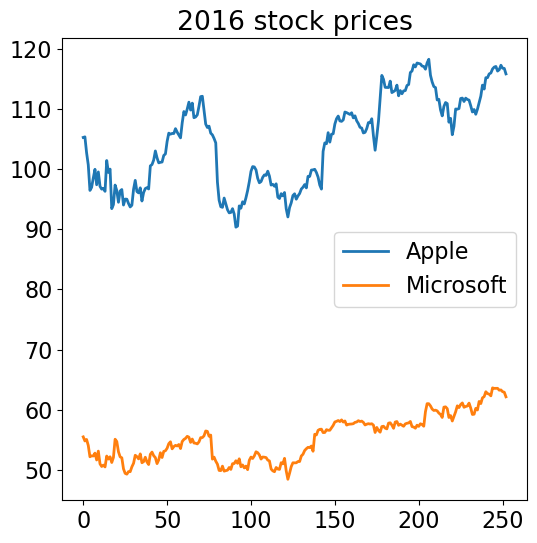

In [70]:
_ = df_prices[['Apple', 'Microsoft']].plot(title='2016 stock prices', figsize=(6., 6.))

In [71]:
# Calculate normalized daily growth
df_incs = df_prices.drop('Date', axis=1)
df_incs = ((df_incs - df_incs.shift(1))/df_incs.shift(1)).loc[1:, :]
df_incs['Date'] = df_prices.Date
df_incs.head(10)

,Apple,Microsoft,Intel,IBM,Facebook,Google,Date
1,0.000855,-0.012257,-0.013353,-0.012135,-0.023314,-0.022454,2016-01-04
2,-0.025059,0.004562,-0.004707,-0.000735,0.004989,0.000998,2016-01-05
3,-0.019570,-0.018165,-0.022170,-0.005006,0.002336,0.001400,2016-01-06
4,-0.042205,-0.034783,-0.037485,-0.017090,-0.049043,-0.023170,2016-01-07
5,0.005288,0.003067,-0.010364,-0.009258,-0.006025,-0.016410,2016-01-08
6,0.016192,-0.000573,0.017455,0.012155,0.001849,0.002184,2016-01-11
7,0.014513,0.009178,0.019339,-0.002477,0.019075,0.014022,2016-01-12
8,-0.025710,-0.021599,-0.023562,-0.013017,-0.039549,-0.035134,2016-01-13
9,0.021871,0.028466,0.026011,0.013265,0.030700,0.020212,2016-01-14
10,-0.024015,-0.039917,-0.091020,-0.021669,-0.034563,-0.028361,2016-01-15


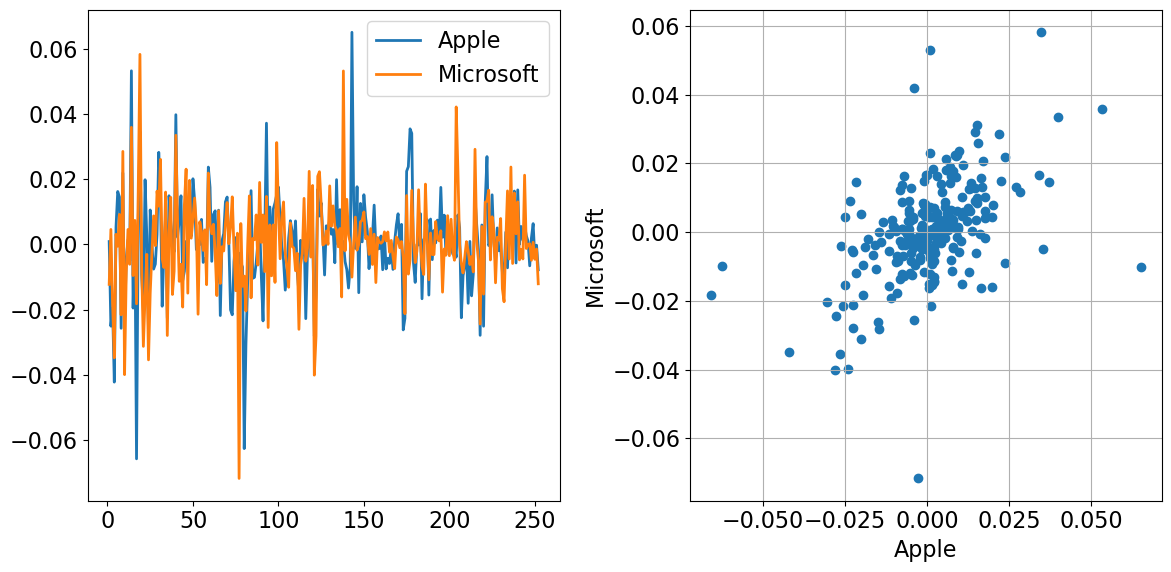

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12., 6.))
_ = df_incs[['Apple', 'Microsoft']].plot(ax=ax1)
_ = ax2.scatter(df_incs['Apple'], df_incs['Microsoft'])
ax2.grid()
ax2.set_xlabel('Apple')
ax2.set_ylabel('Microsoft')
plt.tight_layout()

We will use the `fit` method to obtain the estimators for the mean and standard deviation.

In [73]:
p = stats.norm.fit(df_incs.Apple)
print(p)

(0.000487592455494109, 0.014692416094615579)


In [74]:
# We create distributions based on the estimators.
app_dist = stats.norm(*p)

In [75]:
# Let's check if the sample comes from a normal distribution using the Kolmogorov-Smirnov test.
app_K, app_p = stats.kstest(df_incs['Apple'], app_dist.cdf)
print_result(app_p, alpha)

p = 0.02628
H0 not rejected


<a id=exercise_5></a>
## Exercise 5

Let's do the same for Microsoft:
* Fit a normal distribution
* Create a distribution based on the fit
* Check if the sample comes from a normal distribution

<a id=special_functions></a>
# Special functions

Full list is [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/special.html).

<a id=bessel></a>
## Bessel functions

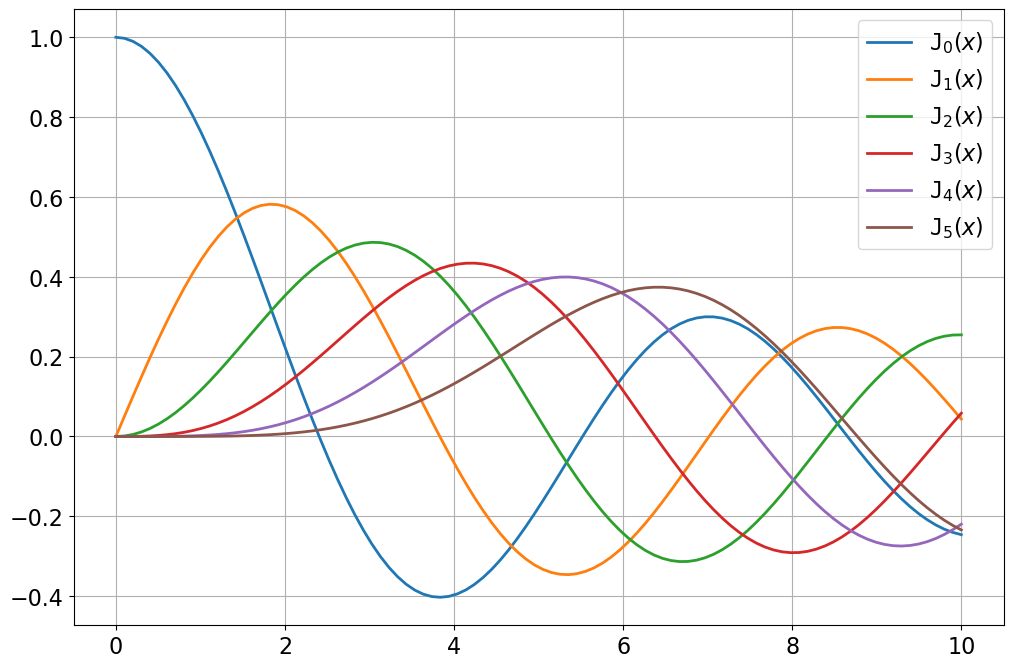

In [77]:
from scipy.special import jn

x = np.linspace(0, 10, 100)
for n in range(6):
    plt.plot(x, jn(n, x), label=r'$\mathtt{J}_{%i}(x)$' % n)
plt.grid()
plt.legend();

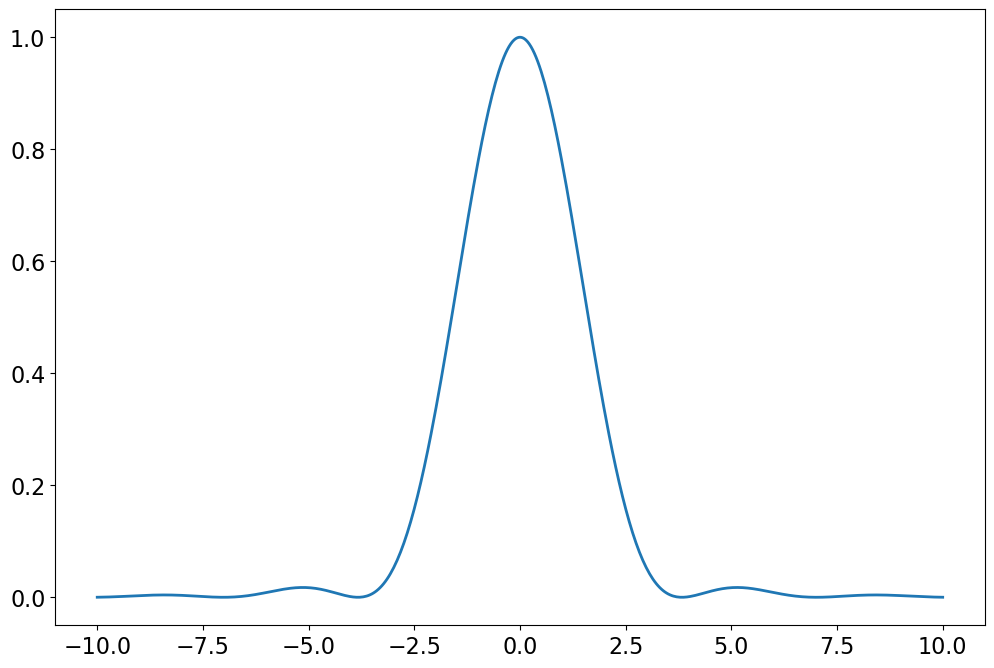

<Figure size 1200x800 with 0 Axes>

In [78]:
import mpl_toolkits.mplot3d.axes3d as plt3d
from matplotlib.colors import LogNorm

def airy_disk(x):
    mask = x != 0
    result = np.empty_like(x)
    result[~mask] = 1.0
    result[mask] = (2 * jn(1, x[mask]) / x[mask])**2
    return result

# 2D plot
r = np.linspace(-10, 10, 500)
plt.plot(r, airy_disk(r))

# 3D plot
x = np.arange(-10, 10.1, 0.1)
y = np.arange(-10, 10.1, 0.1)

X, Y = np.meshgrid(x, y)
Z = airy_disk(np.sqrt(X**2 + Y**2))

result
fig = plt.figure()
ax = plt3d.Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap='gray', norm=LogNorm(), lw=0)

None

<a id=erf></a>
## Error function and Gaussian distribution's CDF

$$\mathrm{erf}(z) = \frac{2}{\sqrt{\pi}} \int_0^z \exp\left( -t^2 \right) dt $$
$$\mathrm{ndtr}(z) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^z \exp\left( \frac{-t^2}{2} \right) dt $$

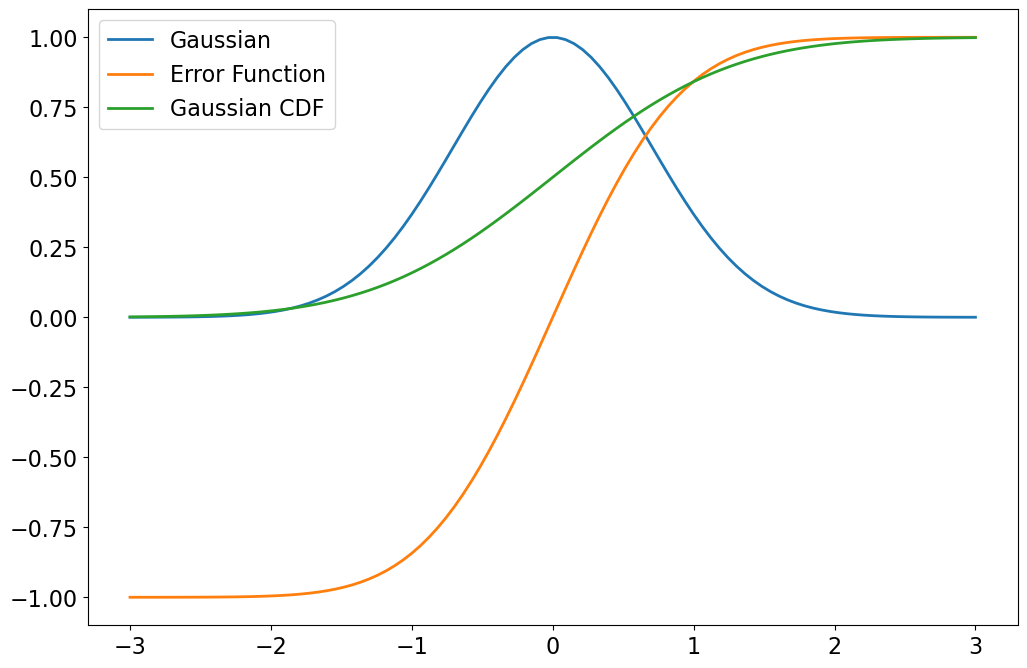

In [79]:
from scipy.special import erf, ndtr

def gaussian(z):
    return np.exp(-z**2)

x = np.linspace(-3, 3, 100)
plt.plot(x, gaussian(x), label='Gaussian')
plt.plot(x, erf(x), label='Error Function')
plt.plot(x, ndtr(x), label='Gaussian CDF')
plt.ylim(-1.1, 1.1)
plt.legend(loc='best');

<a id=ortho_polys></a>
## Orthogonal polynomials

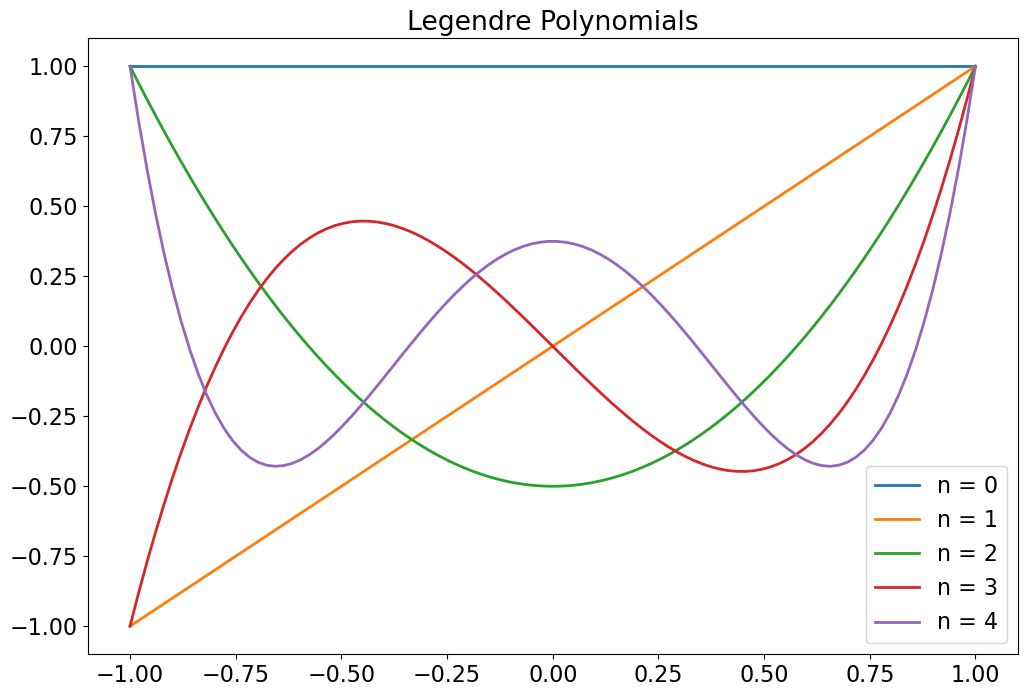

In [80]:
from scipy.special import eval_legendre, eval_laguerre, eval_hermite, eval_chebyt

ortho_poly_dict = {'Legendre': eval_legendre,
                   'Laguerre': eval_laguerre,
                   'Hermite': eval_hermite,
                   'Chebyshev T': eval_chebyt}

def plot_ortho_poly(name):
    plt.figure()
    f = ortho_poly_dict[name]
    x = np.linspace(-1, 1, 100)
    for n in range(5):
        plt.plot(x, f(n, x), label='n = %i' % n)
    if name in ['Legendre', 'Chebyshev']:
        plt.ylim(-1.1, 1.1)
    plt.legend(loc='best', fontsize=16)
    plt.title(name + ' Polynomials')
    
plot_ortho_poly('Legendre')
# plot_ortho_poly('Laguerre')
# plot_ortho_poly('Hermite')
# plot_ortho_poly('Chebyshev T')

## Additional Information

#### Fitting with `iminuit`

One of the most comprehensive packages for function optimization and minimization is [MINUIT](https://en.wikipedia.org/wiki/MINUIT). Python provides a way to use MINUIT's C++ code through the `iminuit` package.

More information can be found in the [iminuit documentation](http://iminuit.readthedocs.io/en/latest/), as well as in the available tutorials on [GitHub](https://github.com/scikit-hep/iminuit/tree/develop/doc/tutorial).